# Exploratory Data Analysis 

#### Import all the required libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
from wordcloud import WordCloud

import umap
import time
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Download required nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hagayzamir/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hagayzamir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hagayzamir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Read the data into a pandas dataframe

In [15]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/original_raw_data.csv')

In [16]:
df.sample(5)

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
1239         1266      3            1                   2        0      1   
10794       11075      4            0                   3        1      1   
19921       20362      3            0                   2        1      1   
17907       18309      3            0                   3        0      1   
9983        10255      3            0                   3        0      1   

                                                   tweet  
1239   &#8220;@EdgarGuillenjr: Lol good now I got the...  
10794  I need to jump in the shop on fritag for 72 be...  
19921                            RT @right_in_the: pussy  
17907  RT @TylerZirhut: @BINDLE13 @gingerash2013 haha...  
9983                       I ain't don't turnin up bitch

In [17]:
# Removing the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [18]:
df.sample(5)

count  hate_speech  offensive_language  neither  class  \
15256      3            0                   3        0      1   
11477      3            1                   2        0      1   
21391      3            2                   1        0      0   
16052      3            0                   3        0      1   
24223      3            0                   3        0      1   

                                                   tweet  
15256  RT @FriendlyAssh0le: i dont give a fuck what m...  
11477   Idk what's worse then a broke hoe with potential  
21391  That dumb black bitch that was getting the car...  
16052  RT @King_Shawn_6: &#8220;@white_thunduh: Dez i...  
24223  my bitch look like a black barbie n nigga imma...

### Understanding the Features

    1 - count (numeric - representative of the total number of people who rated this entry)
    2 - hate_speech (numeric - from the total count above)
    3 - offensive_language (numeric - from the total count above)
    4 - neither (numeric - from the total count above)
    5 - class (numeric 0 - offensive , 1 - hate speech or 2 - neither)
    6 - tweet - (text) 

#### Text Preprocessing

In [19]:
# Initialize lemmatizer, stemmer and TweetTokenizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
tweet_tokenizer = TweetTokenizer()

In [20]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove 'rt' as it refer to a re-tweet in the tweeet and is non important for our model
stop_words.update(['RT', 'I'])

>The preprocess_text function below **tokenizes** the input text, **lemmatizes and stems the tokens**, **removes stopwords** and **non-alphabetic** tokens. The function then **joins** the processed tokens back into a single string and returns it.

In [21]:
def preprocess_text(text):
    # Tokenize the text
    word_tokens = tweet_tokenizer.tokenize(text)

    # Lemmatize the tokens, stem the tokens, remove stopwords and non-alphabetic tokens
    processed_tokens = [stemmer.stem(lemmatizer.lemmatize(w)) for w in word_tokens if w not in stop_words and w.isalpha()]

    # Join the tokens back into a single string and return it
    return ' '.join(processed_tokens)

In [22]:
# Apply the preprocessing function to the 'tweet' column
df['processed_tweet'] = df['tweet'].apply(preprocess_text)

In [23]:
df

count  hate_speech  offensive_language  neither  class  \
0          3            0                   0        3      2   
1          3            0                   3        0      1   
2          3            0                   3        0      1   
3          3            0                   2        1      1   
4          6            0                   6        0      1   
...      ...          ...                 ...      ...    ...   
24778      3            0                   2        1      1   
24779      3            0                   1        2      2   
24780      3            0                   3        0      1   
24781      6            0                   6        0      1   
24782      3            0                   0        3      2   

                                                   tweet  \
0      !!! RT @mayasolovely: As a woman you shouldn't...   
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
...                                                  ...   
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   
24779  you've gone and broke the wrong heart baby, an...   
24780  young buck wanna eat!!.. dat nigguh like I ain...   
24781              youu got wild bitches tellin you lies   
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   

                                         processed_tweet  
0      as woman complain clean hous man alway take trash  
1         boy dat cold tyga dwn bad cuffin dat hoe place  
2      dawg you ever fuck bitch start cri you confus ...  
3                                       look like tranni  
4      the shit hear might true might faker bitch tol...  
...                                                  ...  
24778  muthaf lie right hi tl trash now mine bibl scr...  
24779    gone broke wrong heart babi drove redneck crazi  
24780  young buck wanna eat dat nigguh like aint fuck...  
24781                     youu got wild bitch tellin lie  
24782  ruffl ntac eileen dahlia beauti color combin p...  

[24783 rows x 7 columns]

## Phase 1 Data Summary

>The function **data_summary(df)** performs initial data exploration and provides a summary of the input DataFrame, **df**. Below are the details of its operations:

1. **Dataset Shape**: Prints the shape of the dataset (number of rows, number of columns).

2. **Dataset Columns**: Lists all the columns in the dataset.

3. **Data Types**: Displays the data type of each column.

4. **Unnamed Column Removal**: Drops the 'Unnamed: 0' column (if it exists in the dataset) and prints the updated columns list. This is usually an artifact from reading the data where the index column was also saved.

5. **Continuous Columns Statistics**: Provides basic statistics such as count, mean, std, min, quartiles, and max for continuous numerical columns. This is done using the **.describe()** function.

6. **Categorical Column Statistics**: Prints the distribution of categories in the 'class' column using **.value_counts()** function.

7. **Additional Statistics for Continuous Columns**: For each of the continuous columns (count, hate_speech, offensive_language, neither), it calculates and prints additional statistics - mean, median, mode, min, max.

>This function does not return any value but prints the above information to the console. It's a great tool for a quick overview of your data when starting an exploratory data analysis (EDA) process.

In [24]:
# Data summary
def data_summary(df):
    # Basic information about the dataset
    print("\n###################################################")
    print("Dataset shape:")
    print(df.shape)
    print("\n###################################################")
    print("\nDataset columns:")
    print(df.columns)
    print("\n###################################################")
    print("\nData types:")
    print(df.dtypes)
    print("\n###################################################")
    print("\nData NULL:")
    print(df.isnull().sum())
    print("\n###################################################")
    # Basic statistics for continuous columns
    print("\nBasic statistics for continuous columns:")
    print(df.describe())
    print("\n###################################################")
    # Basic statistics for categorical columns
    print("\nBasic statistics for categorical columns:")
    print(df['class'].value_counts())
    print("\n###################################################")
    
    # Additional basic statistics
    continuous_columns = ['count', 'hate_speech', 'offensive_language', 'neither']
    for col in continuous_columns:
        print(f"\nAdditional statistics for {col}:")
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Mode: {df[col].mode().values[0]}")
        print(f"Min: {df[col].min()}")
        print(f"Max: {df[col].max()}")

In [25]:
# Call the data_summary function
data_summary(df)


###################################################
Dataset shape:
(24783, 7)

###################################################

Dataset columns:
Index(['count', 'hate_speech', 'offensive_language', 'neither', 'class',
       'tweet', 'processed_tweet'],
      dtype='object')

###################################################

Data types:
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
processed_tweet       object
dtype: object

###################################################

Data NULL:
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
processed_tweet       0
dtype: int64

###################################################

Basic statistics for continuous columns:
              count   hate_speech  offensive_language       neither  \
count  24783.000000  247

### Numeric values plots

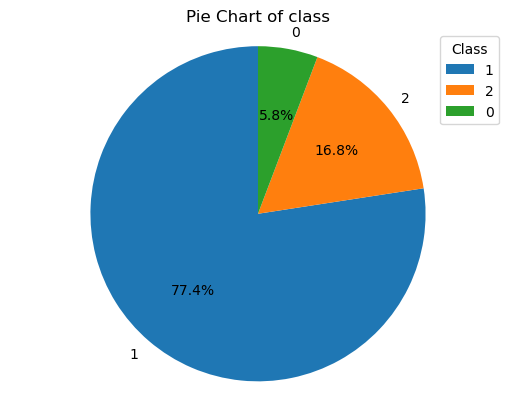

In [38]:
# Pie chart for the categorical column (class)
plt.figure()
class_counts = df['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of class')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.legend(class_counts.index, title="Class", loc="best")  # Add legend to the pie chart
plt.savefig('../plots/Pie Chart of class.png')
plt.show()

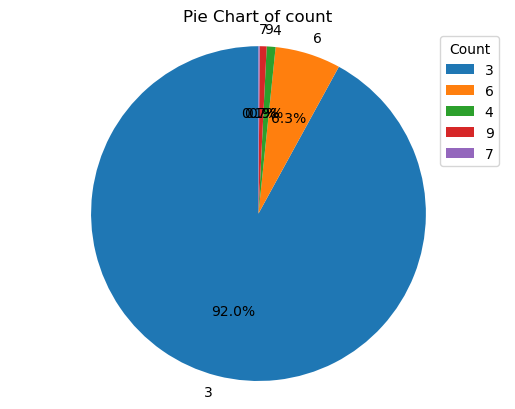

In [39]:
# Pie chart for the numerical column (count)
plt.figure()
class_counts = df['count'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of count')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.legend(class_counts.index, title="Count", loc="best")  # Add legend to the pie chart
plt.savefig('../plots/Pie Chart of count.png')
plt.show()

In [42]:
# Define colors
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(15,10))

for i, col in enumerate(['count', 'hate_speech', 'offensive_language', 'neither'], start=1):
    plt.subplot(2, 2, i)
    sns.violinplot(x = df[col], color=colors[i-1])
    plt.title(f'Violin plot of {col}')

plt.tight_layout()
plt.savefig('../plots/Violin plot [1] of count, hate_speech, offensive_language, neither.png')
plt.show()

In [41]:
# Define colors
colors = ['blue', 'green', 'orange']

plt.figure(figsize=(10,8))

# Create a list to store dataset slices
data = [df[col] for col in ['hate_speech', 'offensive_language', 'neither']]

# Create a violin plot with all distributions
parts = plt.violinplot(data, showmeans=False, showmedians=False, showextrema=False)

# Change the body color
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_edgecolor('black')
    pc.set_alpha(1)

# Add title and labels
plt.title('Violin plot of Tweet Data Features')
plt.xlabel('Features')
plt.ylabel('Values')

# Changing x-axis labels to match the features
plt.xticks([1, 2, 3], ['hate_speech', 'offensive_language', 'neither'])
plt.savefig('../plots/Violin plot [2] of hate_speech, offensive_language, neither.png')
plt.show()

In [43]:
# Heatmap for the correlation between continuous columns
continuous_columns = ['count', 'hate_speech', 'offensive_language', 'neither']
plt.figure()
corr_matrix = df[continuous_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('../plots/Correlation Heatmap of count, hate_speech, offensive_language, neither.png')
plt.show()

### Text (tweets) words plots

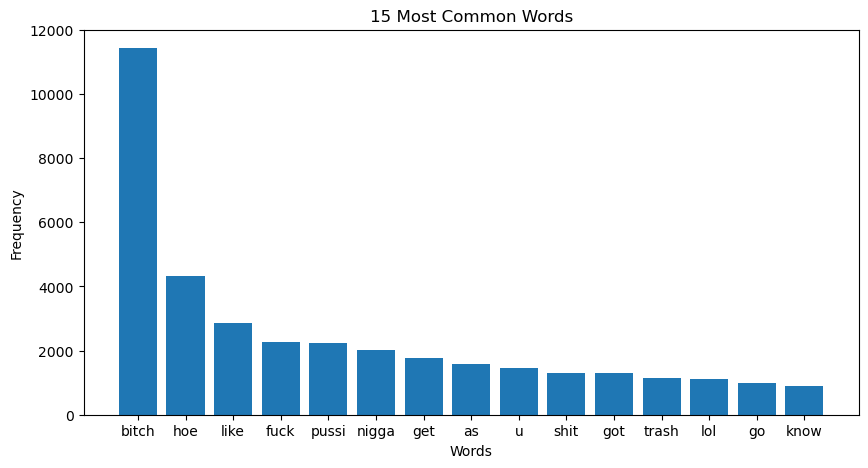

In [44]:
# Count the frequency of each word in the processed tweets
word_counts = Counter(" ".join(df['processed_tweet']).split())

# Generate a bar plot of the 15 most common words
most_common_words = word_counts.most_common(15)
words, counts = zip(*most_common_words)

plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('15 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.savefig('../plots/15 most common words.png')
plt.show()

In [45]:
# Generate a word cloud of the most common words
wordcloud = WordCloud(width=1200, height=700, random_state=42, max_font_size=110).generate(" ".join(df['processed_tweet']))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('../plots/Word cloud of the most common words.png')
plt.show()

In [33]:
# Flatten the list of words in processed_tweet
all_words = [word for tweet in df['processed_tweet'] for word in tweet.split()]

# Count all the words using Counter
word_freq = Counter(all_words)

# Get the 15 most common words
common_words = word_freq.most_common(15)

In [34]:
from gensim.models import Word2Vec

# Create Word2Vec model
model = Word2Vec(df['processed_tweet'].apply(lambda x: x.split()), min_count=1)

# Get the word vectors for the 15 most common words
common_vectors = model.wv[[word[0] for word in common_words]]

In [35]:
from sklearn.decomposition import PCA

# Fit a PCA model to the vectors
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(common_vectors)

In [46]:
import plotly.graph_objects as go

# Get the 15 most common words
most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:15]
words, frequencies = zip(*most_common_words)  # unzip the list of tuples

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y = list(words),
    x = list(frequencies),
    textinfo = "value+percent initial"
))

fig.update_layout(
    title = "Funnel-Chart of the 15 Most Common Words",
    xaxis_title = "Frequency",
    yaxis_title = "Words"
)
plt.savefig('../plots/Funnel chart of the most common words.png')
fig.show()

<Figure size 640x480 with 0 Axes>

In [47]:
# Get the 15 most common words
most_common_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:15]
words, frequencies = zip(*most_common_words)  # unzip the list of tuples

# Create a bubble chart
fig = go.Figure(data=[go.Scatter(
    x=words,
    y=frequencies,
    mode='markers+text',
    text=words,  # this will place words inside the bubbles
    marker=dict(
        size=frequencies,
        sizemode='area',
        sizeref=2.*max(frequencies)/(40.**2),
        sizemin=4
    ),
    textposition='middle center'  # this will position the words in the middle of the bubbles
)])

fig.update_layout(
    title='Bubble Chart of the 15 Most Common Words',
    xaxis=dict(
        title='Words',
        gridcolor='white',
        type='category',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Frequency',
        gridcolor='white',
        gridwidth=2,
    ),
)

plt.savefig('../plots/Bubble chart of the most common words.png')

fig.show()


<Figure size 640x480 with 0 Axes>